In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage import io
from skimage.color import rgb2gray

In [2]:
def quantize_image_colors(img_array, bit=1, verbose=False):
    
    if verbose:
        print("input: ")
        print(img_array.dtype, img_array.shape)
        print(f"{len(np.unique(img_array))} values. Max: {img_array.max()}, Min: {img_array.min()}", )
        
        print(f"\nQuantizing image to {bit} bits.")
    
    # divide by 255
    img_array = img_array.astype(np.uint8)
    binary_img_array_float = img_array / 255 #(2**8)-1
    
    # multiply new max
    quantized_img_array = binary_img_array_float * ((2**bit)-1)
    print(quantized_img_array.max())
    # Turn to uint8
    quantized_img_array = quantized_img_array.astype(np.uint8) / ((2**bit)-1) 
    
    # return back to 8 bit 0-255
    quantized_img_array = quantized_img_array * ((2**8)-1)
    
    out = np.asarray(quantized_img_array, dtype=np.uint8)
    if verbose:
        print("\nout: ")
        print(out.dtype, out.shape)
        print(f"{len(np.unique(out))} values. Max: {out.max()}, Min: {out.min()}", )
        print(np.unique(out))
        
    return out

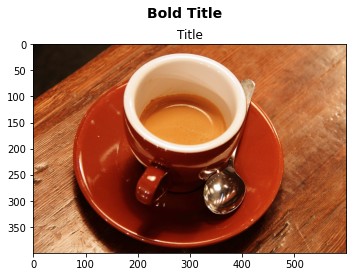

In [3]:
def show_img(img, cmap=None, save=False, title="Title", bold_title="Bold Title"):

    fig = plt.figure()
    ax = fig.add_subplot()
    fig.subplots_adjust(top=0.85)

    # Set titles for the figure and the subplot respectively
    fig.suptitle(bold_title, fontsize=14, fontweight='bold')
    ax.set_title(title)

    ax.imshow(img, cmap=cmap)
    if save:
        plt.savefig(f"{bold_title}.jpg", bbox_inches="tight",pad_inches=.4)
    plt.show()

show_img(data.coffee(),)

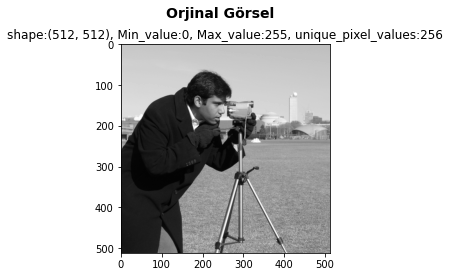

127.0


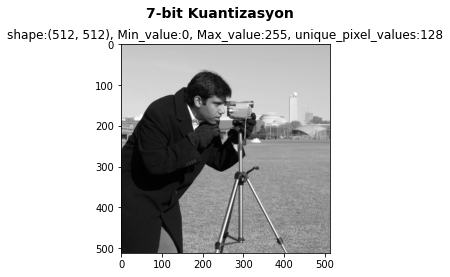


63.0


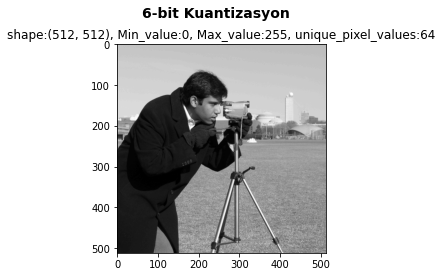


31.0


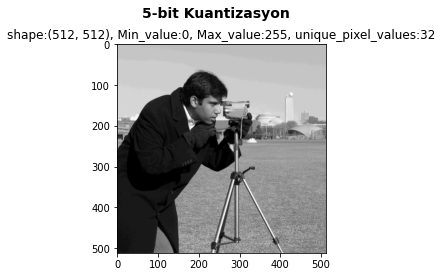


15.0


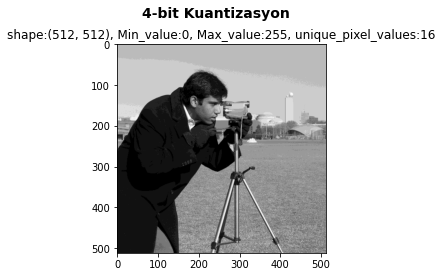


7.0


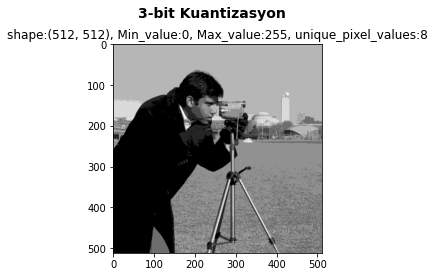


3.0


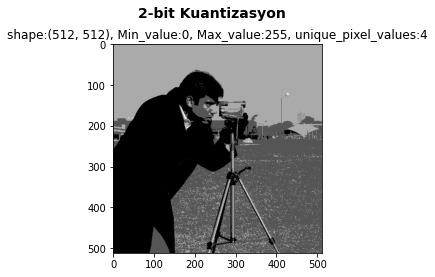


1.0


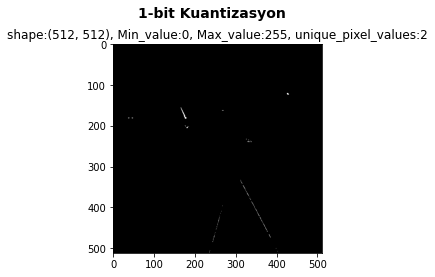

In [4]:
def test(fn, img=None, gray=False):
    
    if img is None:
        img = io.imread('https://i.stack.imgur.com/QCl8D.jpg')
    
    if gray:
        img = rgb2gray(img)
    if img.max() <= 1:
        img = img*255

    img = np.asarray(img, np.uint8)
    show_img(img,
            save=True,
            cmap="gray", 
             title=f"shape:{img.shape}, Min_value:{img.min()}, Max_value:{img.max()}, unique_pixel_values:{len(np.unique(img))}", 
             bold_title=f"Orjinal Görsel")

    
    for i in reversed(range(1, 8)):
        out=fn(img, bit=i)
        
        
        show_img(out,
                 save=True,
                 cmap="gray", 
                 title=f"shape:{out.shape}, Min_value:{out.min()}, Max_value:{out.max()}, unique_pixel_values:{len(np.unique(out))}", 
                 bold_title=f"{i}-bit Kuantizasyon")
        print()
        #io.imshow(out, cmap="gray")
        #plt.show()

test(img=data.camera(),fn=quantize_image_colors, gray=False)

In [5]:
from sklearn.cluster import KMeans

def kmeans_color_quant(img, bit=8):
    
    bit = 2
    n_colors = 2**bit

    arr = img.reshape((-1, 3))
    kmeans = KMeans(n_clusters=n_colors, random_state=42).fit(arr)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    less_colors = centers[labels].reshape(img.shape).astype('uint8')
    return less_colors